In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 1. Load the dataset into python environment

In [486]:
data=pd.read_csv('C:\\Users\\91735\\Downloads\\titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [487]:
df=pd.read_csv('C:\\Users\\91735\\Downloads\\titanic_dataset.csv',index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [488]:
df.shape

(891, 11)

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [490]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [491]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Out of 891 people 342 people survived in the incident and 549 were unsurvived

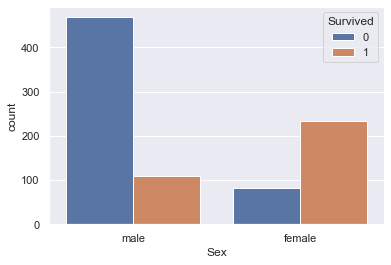

In [492]:
sns.countplot(data=df,x='Sex',hue='Survived')
sns.set(style='darkgrid')

no of females survived is higher than males

# 4. Fill in all the missing values present in all the columns in the dataset

In [493]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

we can see that age,cabin and embarked contains null values

   and cabin contains null values more than half of the dataset ,so it is better to drop cabin column

In [494]:
df=df.drop(columns='Cabin',axis=1)

In [495]:
df.dtypes[['Age','Embarked']]

Age         float64
Embarked     object
dtype: object

embarked have object data typesand age have floating point data type

In [496]:
##filling the missing values
for i in['Age','Embarked']:
     if(i=='Age'):
        df[i]=df[i].fillna(df[i].median())
     else:
        df[i].fillna(df[i].mode()[0], inplace=True)

In [497]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [498]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Handling outliers in the dataset

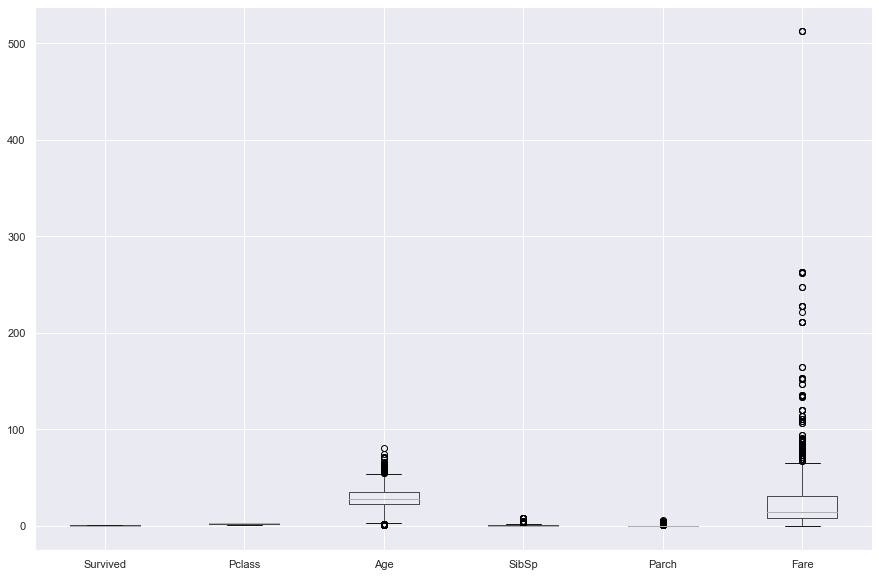

In [499]:
graph=df.select_dtypes(include=['int64','float64','int32'])
graph.boxplot(figsize=(15,10))
plt.show()

In [500]:
#IQR calculation
Q1=df.quantile(.25)
Q3=df.quantile(.75)
IQR=Q3-Q1
print(((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).sum())

Age          66
Embarked      0
Fare        116
Name          0
Parch       213
Pclass        0
Sex           0
SibSp        46
Survived      0
Ticket        0
dtype: int64


In [501]:
for i in ['Age','SibSp','Parch','Fare']:
         Q1=np.percentile(df[i],25,interpolation='midpoint')
         Q2=np.percentile(df[i],50,interpolation='midpoint')
  
         Q3=np.percentile(df[i],75,interpolation='midpoint')
            
    
         print(Q1,Q2,Q3)
         #Computation of IQR,lower limit and upper limit
            
    
         IQR=Q3-Q1
         ll=Q1-1.5*IQR
    
         ul=Q3+1.5*IQR

         #Identifying outlier values
    
         outliers=[]
         for x in df[i]:
        
             if (x>ul)or(x<ll):
        
                outliers.append(x)
    
         ind=df[i]>ul
         i=df.loc[ind].index
    
         df.drop(i,inplace=True)

22.0 28.0 35.0
0.0 0.0 1.0
0.0 0.0 0.0
7.8542 10.0083 26.0


In [502]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [503]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

# Splitting the dataset

In [505]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q


In [506]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [508]:
y=df['Survived']
X=df.drop(['Survived','Name','Ticket','Fare','Embarked','Parch','Sex'],axis=1)

In [509]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

# Feature scaling

In [510]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [511]:
X.describe()

,Pclass,Age,SibSp
count,561.000000,561.000000,561.000000
mean,2.520499,29.171123,0.190731
std,0.717155,8.463058,0.440357
min,1.000000,5.000000,0.000000
25%,2.000000,24.000000,0.000000
50%,3.000000,28.000000,0.000000
75%,3.000000,32.000000,0.000000
max,3.000000,54.000000,2.000000


# fitting gaussian naive bayes to the training set

In [512]:
classifier= GaussianNB()
classifier.fit(X_train, y_train)
classifier.class_prior_

array([0.71173469, 0.28826531])

# making confusion matrix

In [513]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)
print('Accuracy is',accuracy_score(y_test,y_pred))
cm

Accuracy is 0.727810650887574


array([[118,   3],
       [ 43,   5]], dtype=int64)

# fitting bernollis naive bayes to the training set

In [514]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

# making confusion matrix

In [515]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)
print('Accuracy is',accuracy_score(y_test,y_pred))
cm

Accuracy is 0.727810650887574


array([[118,   3],
       [ 43,   5]], dtype=int64)

we have an accuracy of 72.7%